In [16]:
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np 

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [18]:
from pathlib import Path

csv_candidates = [
	Path("FMsocial-deter.csv"),
    Path("data/FMsocial-deter.csv"),
]

search_roots = [Path.cwd(), *Path.cwd().parents]
csv_path = None
for root in search_roots:
	csv_path = next((root / p for p in csv_candidates if (root / p).exists()), None)
	if csv_path is not None:
		break

if csv_path is None:
	csv_path = next(Path.cwd().rglob("*.csv"), None)

if csv_path is None:
	print("No CSV file found. Please place a CSV file in the project folder.")
	df = pd.DataFrame()
else:
	df = pd.read_csv(csv_path)
	print(df.dtypes)

ST                int64
STATE            object
ST_ABBR          object
STCNTY            int64
COUNTY           object
FIPS              int64
LOCATION         object
AREA_SQMI       float64
E_TOTPOP          int64
M_TOTPOP          int64
E_HU              int64
M_HU              int64
E_HH              int64
M_HH              int64
E_POV150          int64
M_POV150          int64
E_UNEMP           int64
M_UNEMP           int64
E_HBURD           int64
M_HBURD           int64
E_NOHSDP          int64
M_NOHSDP          int64
E_UNINSUR         int64
M_UNINSUR         int64
E_AGE65           int64
M_AGE65           int64
E_AGE17           int64
M_AGE17           int64
E_DISABL          int64
M_DISABL          int64
E_SNGPNT          int64
M_SNGPNT          int64
E_LIMENG          int64
M_LIMENG          int64
E_MINRTY          int64
M_MINRTY          int64
E_MUNIT           int64
M_MUNIT           int64
E_MOBILE          int64
M_MOBILE          int64
E_CROWD           int64
M_CROWD         

In [19]:
rename_map = {
    "ST": "state_fips",
    "STATE": "state_name",
    "ST_ABBR": "state_abbreviation",
    "STCNTY": "county_fips",
    "COUNTY": "county_name",
    "FIPS": "zcta_fips",
    "LOCATION": "location_name",
    "AREA_SQMI": "area_sq_miles",

    "E_TOTPOP": "total_population",
    "M_TOTPOP": "total_population_moe",
    "E_HU": "housing_units",
    "M_HU": "housing_units_moe",
    "E_HH": "households",
    "M_HH": "households_moe",

    "E_POV150": "population_below_150_percent_poverty",
    "M_POV150": "population_below_150_percent_poverty_moe",
    "EP_POV150": "pct_below_150_percent_poverty",
    "MP_POV150": "pct_below_150_percent_poverty_moe",

    "E_UNEMP": "unemployed_population_16_plus",
    "M_UNEMP": "unemployed_population_16_plus_moe",
    "EP_UNEMP": "pct_unemployed",
    "MP_UNEMP": "pct_unemployed_moe",

    "E_HBURD": "housing_cost_burdened_households",
    "M_HBURD": "housing_cost_burdened_households_moe",
    "EP_HBURD": "pct_housing_cost_burdened",
    "MP_HBURD": "pct_housing_cost_burdened_moe",

    "E_NOHSDP": "population_no_high_school_diploma",
    "M_NOHSDP": "population_no_high_school_diploma_moe",
    "EP_NOHSDP": "pct_no_high_school_diploma",
    "MP_NOHSDP": "pct_no_high_school_diploma_moe",

    "E_UNINSUR": "uninsured_population",
    "M_UNINSUR": "uninsured_population_moe",
    "EP_UNINSUR": "pct_uninsured",
    "MP_UNINSUR": "pct_uninsured_moe",

    "E_AGE65": "population_age_65_plus",
    "M_AGE65": "population_age_65_plus_moe",
    "EP_AGE65": "pct_age_65_plus",
    "MP_AGE65": "pct_age_65_plus_moe",

    "E_AGE17": "population_age_17_and_under",
    "M_AGE17": "population_age_17_and_under_moe",
    "EP_AGE17": "pct_age_17_and_under",
    "MP_AGE17": "pct_age_17_and_under_moe",

    "E_DISABL": "population_with_disability",
    "M_DISABL": "population_with_disability_moe",
    "EP_DISABL": "pct_with_disability",
    "MP_DISABL": "pct_with_disability_moe",

    "E_SNGPNT": "single_parent_households",
    "M_SNGPNT": "single_parent_households_moe",
    "EP_SNGPNT": "pct_single_parent_households",
    "MP_SNGPNT": "pct_single_parent_households_moe",

    "E_LIMENG": "population_limited_english",
    "M_LIMENG": "population_limited_english_moe",
    "EP_LIMENG": "pct_limited_english",
    "MP_LIMENG": "pct_limited_english_moe",

    "E_MINRTY": "minority_population",
    "M_MINRTY": "minority_population_moe",
    "EP_MINRTY": "pct_minority",
    "MP_MINRTY": "pct_minority_moe",

    "E_MUNIT": "housing_units_multi_unit",
    "M_MUNIT": "housing_units_multi_unit_moe",
    "EP_MUNIT": "pct_multi_unit_housing",
    "MP_MUNIT": "pct_multi_unit_housing_moe",

    "E_MOBILE": "mobile_homes",
    "M_MOBILE": "mobile_homes_moe",
    "EP_MOBILE": "pct_mobile_homes",
    "MP_MOBILE": "pct_mobile_homes_moe",

    "E_CROWD": "crowded_households",
    "M_CROWD": "crowded_households_moe",
    "EP_CROWD": "pct_crowded_households",
    "MP_CROWD": "pct_crowded_households_moe",

    "E_NOVEH": "households_no_vehicle",
    "M_NOVEH": "households_no_vehicle_moe",
    "EP_NOVEH": "pct_households_no_vehicle",
    "MP_NOVEH": "pct_households_no_vehicle_moe",

    "E_GROUPQ": "population_in_group_quarters",
    "M_GROUPQ": "population_in_group_quarters_moe",
    "EP_GROUPQ": "pct_population_in_group_quarters",
    "MP_GROUPQ": "pct_population_in_group_quarters_moe",

    "RPL_THEME1": "socioeconomic_vulnerability_rank",
    "RPL_THEME2": "household_vulnerability_rank",
    "RPL_THEME3": "minority_vulnerability_rank",
    "RPL_THEME4": "housing_transportation_vulnerability_rank",
    "RPL_THEMES": "overall_social_vulnerability_rank",

    "SPL_THEME1": "socioeconomic_vulnerability_score",
    "SPL_THEME2": "household_vulnerability_score",
    "SPL_THEME3": "minority_vulnerability_score",
    "SPL_THEME4": "housing_transportation_vulnerability_score",
    "SPL_THEMES": "overall_vulnerability_score"
}

df = df.rename(columns=rename_map)

KeyError: 'population_no_high_school_diploma'

<Figure size 1200x600 with 0 Axes>

In [38]:
# Ensure dataframe 'df' is available (load it if not already defined)
if 'pd' not in globals():
	import pandas as pd

if 'df' not in globals():
	df = pd.read_csv('Data/FMsocial-deter.csv')

print("All columns in the dataset:")
print(df.columns.tolist())

All columns in the dataset:
['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP', 'E_HU', 'M_HU', 'E_HH', 'M_HH', 'E_POV150', 'M_POV150', 'E_UNEMP', 'M_UNEMP', 'E_HBURD', 'M_HBURD', 'E_NOHSDP', 'M_NOHSDP', 'E_UNINSUR', 'M_UNINSUR', 'E_AGE65', 'M_AGE65', 'E_AGE17', 'M_AGE17', 'E_DISABL', 'M_DISABL', 'E_SNGPNT', 'M_SNGPNT', 'E_LIMENG', 'M_LIMENG', 'E_MUNIT', 'M_MUNIT', 'E_MOBILE', 'M_MOBILE', 'E_CROWD', 'M_CROWD', 'E_NOVEH', 'M_NOVEH', 'E_GROUPQ', 'M_GROUPQ', 'EP_POV150', 'MP_POV150', 'EP_UNEMP', 'MP_UNEMP', 'EP_HBURD', 'MP_HBURD', 'EP_NOHSDP', 'MP_NOHSDP', 'EP_UNINSUR', 'MP_UNINSUR', 'EP_AGE65', 'MP_AGE65', 'EP_AGE17', 'MP_AGE17', 'EP_DISABL', 'MP_DISABL', 'EP_SNGPNT', 'MP_SNGPNT', 'EP_LIMENG', 'MP_LIMENG', 'EP_MUNIT', 'MP_MUNIT', 'EP_MOBILE', 'MP_MOBILE', 'EP_CROWD', 'MP_CROWD', 'EP_NOVEH', 'MP_NOVEH', 'EP_GROUPQ', 'MP_GROUPQ', 'EPL_POV150', 'EPL_UNEMP', 'EPL_HBURD', 'EPL_NOHSDP', 'EPL_UNINSUR', 'SPL_THEME1', 'RPL_THEME1', 'EPL_AGE65', 

In [22]:
print(df.shape)
df.head(10)

(3144, 158)


,state_fips,state_name,state_abbreviation,county_fips,county_name,zcta_fips,location_name,area_sq_miles,total_population,total_population_moe,housing_units,housing_units_moe,households,households_moe,population_below_150_percent_poverty,population_below_150_percent_poverty_moe,unemployed_population_16_plus,unemployed_population_16_plus_moe,housing_cost_burdened_households,housing_cost_burdened_households_moe,population_no_high_school_diploma,population_no_high_school_diploma_moe,uninsured_population,uninsured_population_moe,population_age_65_plus,population_age_65_plus_moe,population_age_17_and_under,population_age_17_and_under_moe,population_with_disability,population_with_disability_moe,single_parent_households,single_parent_households_moe,population_limited_english,population_limited_english_moe,minority_population,minority_population_moe,housing_units_multi_unit,housing_units_multi_unit_moe,mobile_homes,mobile_homes_moe,crowded_households,crowded_households_moe,households_no_vehicle,households_no_vehicle_moe,population_in_group_quarters,population_in_group_quarters_moe,pct_below_150_percent_poverty,pct_below_150_percent_poverty_moe,pct_unemployed,pct_unemployed_moe,pct_housing_cost_burdened,pct_housing_cost_burdened_moe,pct_no_high_school_diploma,pct_no_high_school_diploma_moe,pct_uninsured,pct_uninsured_moe,pct_age_65_plus,pct_age_65_plus_moe,pct_age_17_and_under,pct_age_17_and_under_moe,pct_with_disability,pct_with_disability_moe,pct_single_parent_households,pct_single_parent_households_moe,pct_limited_english,pct_limited_english_moe,pct_minority,pct_minority_moe,pct_multi_unit_housing,pct_multi_unit_housing_moe,pct_mobile_homes,pct_mobile_homes_moe,pct_crowded_households,pct_crowded_households_moe,pct_households_no_vehicle,pct_households_no_vehicle_moe,pct_population_in_group_quarters,pct_population_in_group_quarters_moe,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,socioeconomic_vulnerability_score,socioeconomic_vulnerability_rank,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,household_vulnerability_score,household_vulnerability_rank,EPL_MINRTY,minority_vulnerability_score,minority_vulnerability_rank,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,housing_transportation_vulnerability_score,housing_transportation_vulnerability_rank,overall_vulnerability_score,overall_social_vulnerability_rank,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,1,Alabama,AL,1001,Autauga County,1001,"Autauga County, Alabama",594.454786,58761,0,24457,41,22308,369,11780,1363,752,215,4389,582,3857,512,4225,753,9176,98,13766,42,9425,631,1247,296,203,198,16126,224,970,374,3805,440,307,163,888,237,551,21,20.2,2.3,2.8,0.8,19.7,2.6,9.6,1.3,7.4,1.3,15.6,0.2,23.4,0.1,16.4,1.1,5.6,1.3,0.4,0.4,27.4,0.4,3.9,1.5,15.6,1.8,1.4,0.7,4.0,1.1,0.9,0.0,0.3621,0.1457,0.3388,0.4276,0.4120,1.6862,0.2367,0.1718,0.6962,0.5581,0.5304,0.3150,2.2715,0.3675,0.6354,0.6354,0.6354,0.5921,0.6892,0.3198,0.2491,0.1091,1.9593,0.2358,6.5524,0.2663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42938,2425,385,11496,525,1864,0,636,213,59,71,0,30,1930,598,141,183,10.9,1.7,19.6,0.9,3.2,0.0,1.1,0.4,0.1,0.1,0.0,0.1,3.3,1.0,0.2,0.3
1,1,Alabama,AL,1003,Baldwin County,1003,"Baldwin County, Alabama",1589.861817,233420,0,125113,85,90802,1229,42088,2875,3825,609,21039,1527,14031,1216,21472,1920,49499,64,49396,0,31878,1668,3849,567,1741,496,41259,1020,20730,1122,12752,1015,1801,432,2056,396,3401,75,18.3,1.3,3.4,0.6,23.2,1.7,8.4,0.7,9.3,0.8,21.2,0.1,21.2,0.0,13.9,0.7,4.2,0.6,0.8,0.2,17.7,0.4,16.6,0.9,10.2,0.8,1.9,0.5,2.3,0.4,1.5,0.0,0.2638,0.2393,0.6297,0.3303,0.5

In [35]:
if 'csv_path' in globals() and csv_path is not None:
    df = pd.read_csv(csv_path)
else:
    df = pd.read_csv('Data/FMsocial-deter.csv')

columns_to_delete = [
    "E_MINRTY",
    "M_MINRTY",
    "EP_MINRTY",
    "MP_MINRTY"
]

df = df.drop(columns=columns_to_delete, errors="ignore")

In [9]:
df.isna()
df.isna().sum()

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
M_TOTPOP        0
E_HU            0
M_HU            0
E_HH            0
M_HH            0
E_POV150        0
M_POV150        0
E_UNEMP         0
M_UNEMP         0
E_HBURD         0
M_HBURD         0
E_NOHSDP        0
M_NOHSDP        0
E_UNINSUR       0
M_UNINSUR       0
E_AGE65         0
M_AGE65         0
E_AGE17         0
M_AGE17         0
E_DISABL        0
M_DISABL        0
E_SNGPNT        0
M_SNGPNT        0
E_LIMENG        0
M_LIMENG        0
E_MUNIT         0
M_MUNIT         0
E_MOBILE        0
M_MOBILE        0
E_CROWD         0
M_CROWD         0
E_NOVEH         0
M_NOVEH         0
E_GROUPQ        0
M_GROUPQ        0
EP_POV150       0
MP_POV150       0
EP_UNEMP        0
MP_UNEMP        0
EP_HBURD        0
MP_HBURD        0
EP_NOHSDP       0
MP_NOHSDP       0
EP_UNINSUR      0
MP_UNINSUR      0
EP_AGE65        0
MP_AGE65  

In [43]:
df.duplicated(keep=False).sum()

np.int64(0)

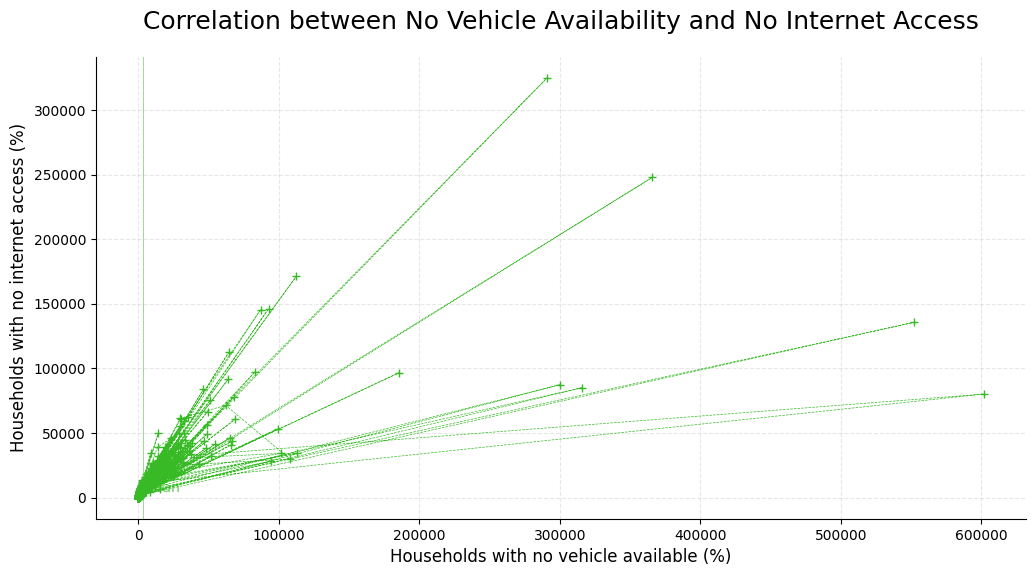

In [46]:
# Use the existing dataframe loaded in earlier cells
df = df.copy()

internet_col_candidates = [
    "households_no_internet",
    "E_NOINT",
    "E_NOINTR",
    "EP_NOINT",
    "EP_NOINTR",
    "NOINTERNET",
    "no_internet"
]

internet_col = next((col for col in internet_col_candidates if col in df.columns), None)

vehicle_col_candidates = [
    "households_no_vehicle",
    "E_NOVEH",
    "EP_NOVEH"
]
vehicle_col = next((col for col in vehicle_col_candidates if col in df.columns), None)

if internet_col is None:
    print("No internet-access column found. Available columns:")
    print(df.columns.tolist())
elif vehicle_col is None:
    print("No no-vehicle column found. Available columns:")
    print(df.columns.tolist())
else:
    plt.figure(figsize=(12, 6))

    plt.plot(
        df[vehicle_col],
        df[internet_col],
        marker='+',
        linestyle='--',
        color='#37BA26',
        linewidth=0.5
    )

    plt.xlabel("Households with no vehicle available (%)", fontsize=12)
    plt.ylabel("Households with no internet access (%)", fontsize=12)
    plt.title("Correlation between No Vehicle Availability and No Internet Access", fontsize=18, pad=20)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    mean_x = df[vehicle_col].mean()
    mean_y = df[internet_col].mean()
    ax.axvline(
        mean_x,
        color="#37BA26BA",
        linewidth=0.5,
        alpha=0.7
    )

    ax.text(
        mean_x + 0.5, 
        mean_y,
        "Mean",
        color="#37BA26BA",
        fontsize=10
    )

    ax.grid(True, linestyle='--', alpha=0.3)

    plt.show()


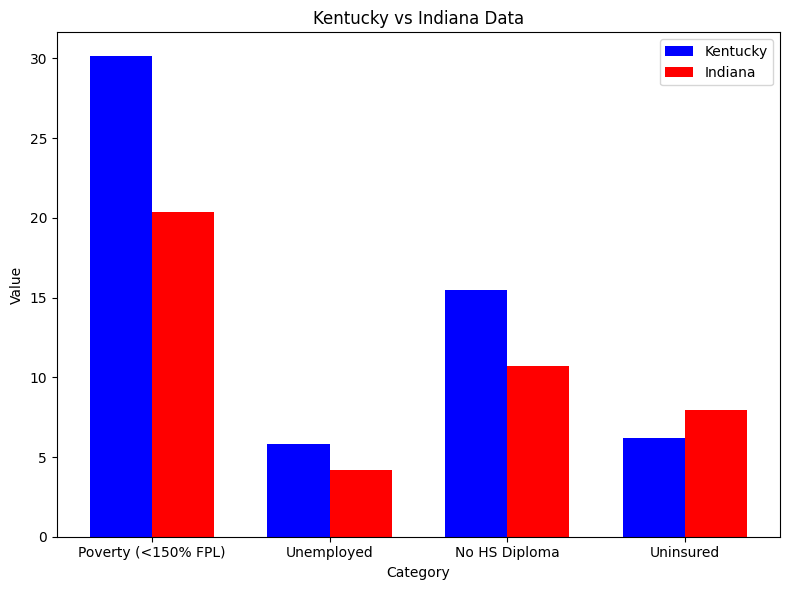

In [57]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# Reuse existing dataframe if it already matches chart format
if not {"Category", "Kentucky", "Indiana"}.issubset(df.columns if "df" in globals() else set()):
    # Load from discovered csv_path first, then common file-name variants
    if "csv_path" in globals() and csv_path is not None and Path(csv_path).exists():
        source_path = csv_path
    else:
        candidates = [
            Path("Data/FMsocial-deter.csv"),
            Path("Data/FMsocial_deter.csv"),
            Path("FMsocial-deter.csv"),
            Path("FMsocial_deter.csv"),
            Path("data/FMsocial-deter.csv"),
            Path("data/FMsocial_deter.csv"),
        ]
        source_path = next((p for p in candidates if p.exists()), None)
        if source_path is None:
            raise FileNotFoundError("Could not find the social determinants CSV file.")

    raw_df = pd.read_csv(source_path)

    # Align columns with renamed notebook schema if needed
    if "rename_map" in globals():
        raw_df = raw_df.rename(columns=rename_map)

    state_col = "state_name" if "state_name" in raw_df.columns else "STATE"
    metrics = [
        ("Poverty (<150% FPL)", "pct_below_150_percent_poverty", "EP_POV150"),
        ("Unemployed", "pct_unemployed", "EP_UNEMP"),
        ("No HS Diploma", "pct_no_high_school_diploma", "EP_NOHSDP"),
        ("Uninsured", "pct_uninsured", "EP_UNINSUR"),
    ]

    ky_mask = raw_df[state_col].astype(str).str.upper().eq("KENTUCKY")
    in_mask = raw_df[state_col].astype(str).str.upper().eq("INDIANA")

    rows = []
    for label, renamed_col, raw_col in metrics:
        col = renamed_col if renamed_col in raw_df.columns else raw_col
        if col in raw_df.columns:
            rows.append(
                {
                    "Category": label,
                    "Kentucky": raw_df.loc[ky_mask, col].mean(),
                    "Indiana": raw_df.loc[in_mask, col].mean(),
                }
            )

    df = pd.DataFrame(rows)


categories = df["Category"]
kentucky_values = df["Kentucky"]
indiana_values = df["Indiana"]

bar_width = 0.35
x_positions = range(len(categories))


plt.figure(figsize=(8, 6))
plt.bar(
        [x - bar_width/2 for x in x_positions],
        kentucky_values,
        width=bar_width,
        color='blue',
        label='Kentucky'
    )
plt.bar(
        [x + bar_width/2 for x in x_positions],
        indiana_values,
        width=bar_width,
        color='red',
        label='Indiana'
    )


plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Kentucky vs Indiana Data")
plt.xticks(ticks=x_positions, labels=categories)
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
source_df = raw_df if "raw_df" in globals() else df

x_candidates = [
    "pct_no_high_school_diploma",
    "EP_NOHSDP",
    "population_no_high_school_diploma",
    "E_NOHSDP",
]
y_candidates = [
    "pct_uninsured",
    "EP_UNINSUR",
    "uninsured_population",
    "E_UNINSUR",
]

x_col = next((c for c in x_candidates if c in source_df.columns), None)
y_col = next((c for c in y_candidates if c in source_df.columns), None)

if x_col is None or y_col is None:
    print("Required columns not found. Available columns:")
    print(source_df.columns.tolist())
else:
    plot_df = source_df[[x_col, y_col]].dropna()

    plt.figure(figsize=(12, 6))
    plt.scatter(
        plot_df[x_col],
        plot_df[y_col],
        marker="+",
        color="#37BA26",
        linewidth=0.5
    )

    plt.xlabel("Persons age 25 and older without a high school diploma (%)", fontsize=12)
    plt.ylabel("Uninsured persons (%)", fontsize=12)
    plt.title("Correlation between No High School Diploma and Uninsured Persons", fontsize=18, pad=20)

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    mean_x = plot_df[x_col].mean()
    mean_y = plot_df[y_col].mean()
    ax.axvline(
        mean_x,
        color="#4426BAB9",
        linewidth=0.5,
        alpha=0.7
    )

    ax.text(
        mean_x + 0.5,
        mean_y,
        "Mean",
        color="#BA2626B9",
        fontsize=10
    )

    ax.grid(True, linestyle="--", alpha=0.3)
    plt.show()

KeyError: 'population_no_high_school_diploma'

<Figure size 1200x600 with 0 Axes>